In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from TX import euler, upf, bcc_rolling_fiber
from random import gauss, normalvariate
rot_vectang=bcc_rolling_fiber.rot_vectang
euler=euler.euler

** joblib was not found - will not be used in TX.upf


# Generate $(10\bar{1}0)\parallel$ED fiber as in the extruded Mg-2Gd rod of [Harmuth et al.]()

## Generate an ideal component

 90.00  90.00  90.00 
Elapsed time for calculting dots:           1 [ ms]

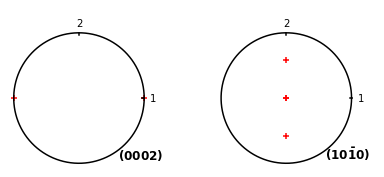

In [3]:
## 
uvw=np.array([0,0,1])  ## //z (dummy)
hkl=np.array([1,0,0]) ## // z

# uvw//X, 
x=uvw/sqrt((uvw**2).sum())
z=hkl/sqrt((hkl**2).sum())
## z should be cross product
y=np.cross(z,x)

## transformation matrix that transform from SA to CA
g_casa=np.zeros((3,3))
g_casa[:,0]=x[:]
g_casa[:,1]=y[:]
g_casa[:,2]=z[:]

phi1,phi,phi2=euler(a=g_casa,echo=False)
print('%6.2f %6.2f %6.2f '%(phi1,phi,phi2))


kwpoles=dict(poles=[[0,0,0,2],[1,0,-1,0]])
gr=np.array([[phi1,phi,phi2,1.]])
mypf=upf.polefigure(grains=gr,csym='hexag')
fig=mypf.pf_new(mode='dot',marker='+',c='r',**kwpoles)

1.8029947856857593 0.008727920609050699


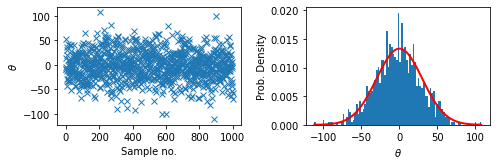

In [4]:
mu, sigma = 0, 30 # mean and standard deviation
nsamp=int(1e3)
nbins=100
s = np.random.normal(mu, sigma, nsamp)
print(abs(mu - np.mean(s)), abs(sigma - np.std(s, ddof=1)))

fig=plt.figure(figsize=(7,2.4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.plot(s,'x')
count, bins, ignored = ax2.hist(s, nbins, density=True)
ax2.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')

ax1.set_ylabel(r'$\theta$')
ax2.set_xlabel(r'$\theta$')
ax1.set_xlabel('Sample no.')
ax2.set_ylabel('Prob. Density')
fig.tight_layout()

Elapsed time for calling cells_pf:          10 [ ms]

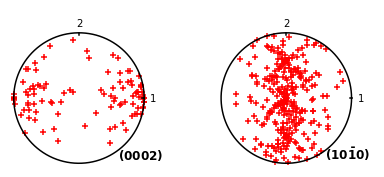

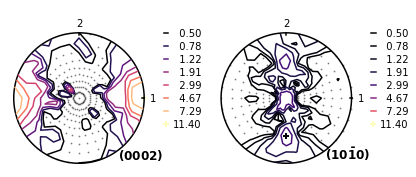

In [5]:
ngr=100
sigma=45
grains=np.zeros((ngr,4))
for i in range(ngr):
    s=np.random.normal(mu, sigma,1)
    #s=30
    newR=rot_vectang(s,g_casa)
    grains[i,:3]=euler(a=newR,echo=False)
    grains[i,3]=1.
mypf=upf.polefigure(grains=grains,csym='hexag')
fig=mypf.pf_new(mode='dot',marker='+',c='r',**kwpoles)
fig=mypf.pf_new(**kwpoles)

In [6]:
def nd_rot(thet):
    return vector_ang(u=[0,0,1],th=thet)
def vector_ang(u,th):
    """
    implementation of subroutine vector_ang in cs.f

    arguments
    =========
    u[3] = vector axis about which the rotation occurs
    th   = radian angle (degree of the rotation)
    """
    u = np.array(u)
    u = u/np.sqrt((u**2).sum()) # normalize
    idx = np.identity(3)
    ct = np.cos(th*np.pi/180.)
    st = np.sin(th*np.pi/180.)
    cm = crossop(u) # cross product operator
    r = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            r[i,j] = idx[i,j] * ct + st * cm[i,j] + \
                     (1. - ct ) * u[i] * u[j]
    return r


def crossop(u):
    """
    Cross operator can be used to obtain the cross
    product as a matrix-vector product

    a x b  = [a_x]_ij [b]_j

    Argument
    ========
    u
    """
    m=np.zeros((3,3))
    m[0][1] = -u[2]
    m[0][2] =  u[1]
    m[1][0] =  u[2]
    m[1][2] = -u[0]
    m[2][0] = -u[1]
    m[2][1] =  u[0]

    return m

 90.00  90.00  90.00 
Elapsed time for calculting dots:           3 [ ms]

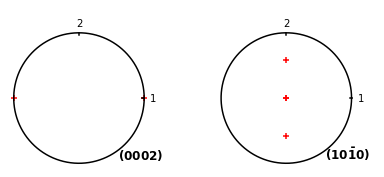

In [7]:
## 
uvw=np.array([0,0,1])  ## //z (dummy)
hkl=np.array([1,0,0]) ## // z

# uvw//X, 
x=uvw/sqrt((uvw**2).sum())
z=hkl/sqrt((hkl**2).sum())
## z should be cross product
y=np.cross(z,x)

## transformation matrix that transform from SA to CA
g_casa=np.zeros((3,3))
g_casa[:,0]=x[:]
g_casa[:,1]=y[:]
g_casa[:,2]=z[:]




phi1,phi,phi2=euler(a=g_casa,echo=False)
print('%6.2f %6.2f %6.2f '%(phi1,phi,phi2))


kwpoles=dict(poles=[[0,0,0,2],[1,0,-1,0]])
gr=np.array([[phi1,phi,phi2,1.]])
mypf=upf.polefigure(grains=gr,csym='hexag')
fig=mypf.pf_new(mode='dot',marker='+',c='r',**kwpoles)

In [8]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)


In [9]:
def write_text(grains,fn):
    with open(fn,'w') as fo:
        fo.write(f'dum\ndum\ndum\nB {grains.shape[0]}\n')
        for i,gr in enumerate(grains):
            fo.write('%13.4e %13.4e %13.4e %13.4e\n'%(gr[0],gr[1],gr[2],gr[3]))

Elapsed time for calling cells_pf:           1 [sec]

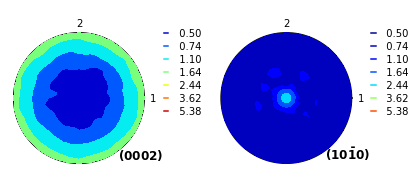

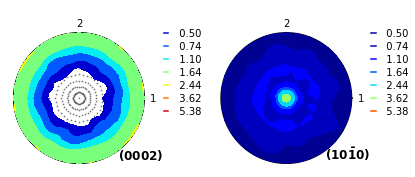

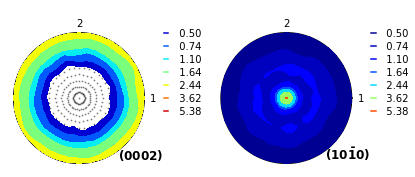

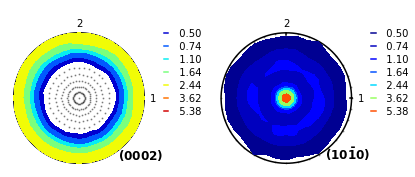

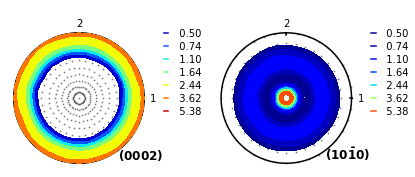

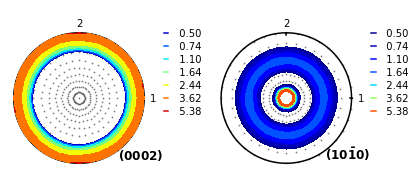

In [10]:
ngr=20000
sigmas=[80, 50, 40,30,20, 10]

for i, sigma in enumerate(sigmas):
    grains=np.zeros((ngr,4))
    for i in range(ngr):
        s=np.random.normal(mu, sigma,1)
        #s=30
        newR=rot_vectang(s,g_casa)

        ## add a random rotation about ND to induce axisymmetry
        dth = random.uniform(-180., 180.)
        g_sasa=nd_rot(dth)
        newR=np.dot(newR,g_sasa) #

        grains[i,:3]=euler(a=newR,echo=False)
        grains[i,3]=1./ngr
        
    write_text(grains,f'/tmp/dum_{ngr}_{sigma}.txt')
    mypf=upf.polefigure(grains=grains,csym='hexag')
    #fig=mypf.pf_new(mode='dot',marker='+',c='r',**kwpoles)
    fig=mypf.pf_new(**kwpoles,mn=0.5,mx=8,
                    nlevs=10,cmap='jet',mode='fill'#cmap=parula_map
                   )#cmap='jet')
    
    fig.savefig(f'/tmp/Mg-Gd_{sigma}.pdf')